<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.2.4-tf


## Step 1: Data Loading

In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

base_dir = 'C:/Users/Brayden/Documents/NP CSF/Year 2 Semester 1/DL/Assignments/Assignment 1'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2:  Develop the Image Classification Models

### Model #1

In [3]:
#Data Augmentation
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

img_size = 150

In [4]:
# Build the Model
# We will resize all the images as 150*150 pixels
# Feel free to resize the images to a smaller size (e.g. 150*150) if your computer computation resource is very limited

img_size = 150

model1 = models.Sequential()
model1.add(layers.Conv2D(128, (3, 3), activation='relu', 
                        input_shape=(img_size, img_size, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(512, (3, 3),  activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 1024)      4

In [5]:
#Train the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [6]:
history = model1.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Train for 375 steps, validate for 50 steps
Epoch 1/30
375/375 [==============================] - 184s 492ms/step - loss: 2.1153 - acc: 0.2193 - val_loss: 2.0196 - val_acc: 0.2690
Epoch 2/30
375/375 [==============================] - 164s 437ms/step - loss: 1.9036 - acc: 0.3049 - val_loss: 1.7128 - val_acc: 0.4040
Epoch 3/30
375/375 [==============================] - 153s 408ms/step - loss: 1.7666 - acc: 0.3721 - val_loss: 1.5386 - val_acc: 0.4640
Epoch 4/30
375/375 [==============================] - 154s 412ms/step - loss: 1.6809 - acc: 0.4103 - val_loss: 1.5070 - val_acc: 0.4540
Epoch 5/30
375/375 [==============================] - 154s 410ms/step - loss: 1.6047 - acc: 0.4415 - val_loss: 1.7766 - val_acc: 0.4150
Epoch 6/30
375/375 [==============================] - 152s 404ms/step - loss: 1.5227 - acc: 0.4752 - val_loss: 1.8827 - val_acc: 0.4090
Epoch 7/30
375/375 [==============================] - 155s 414ms/step - loss: 1.4617 - acc: 0.5047 - val_loss: 1.5708 - val_acc: 0.4680
Epoch

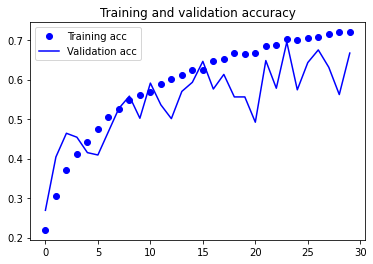

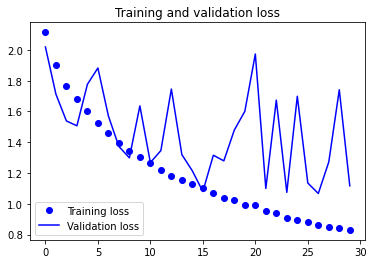

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Self-Made Fine Tuning

In [16]:
img_size = 150

model1 = models.Sequential()
model1.add(layers.Conv2D(128, (3, 3), activation='relu', 
                        input_shape=(img_size, img_size, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(512, (3, 3),  activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 256)       295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 512)       1180160   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 512)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 1024)     

In [17]:
#Train the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [18]:
history = model1.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Train for 375 steps, validate for 50 steps
Epoch 1/30
375/375 [==============================] - 157s 419ms/step - loss: 2.3794 - acc: 0.1372 - val_loss: 2.2674 - val_acc: 0.2000
Epoch 2/30
375/375 [==============================] - 158s 421ms/step - loss: 2.2465 - acc: 0.1849 - val_loss: 2.1496 - val_acc: 0.2060
Epoch 3/30
375/375 [==============================] - 159s 423ms/step - loss: 2.1464 - acc: 0.2228 - val_loss: 1.9660 - val_acc: 0.2920
Epoch 4/30
375/375 [==============================] - 157s 418ms/step - loss: 2.0563 - acc: 0.2665 - val_loss: 1.8929 - val_acc: 0.3380
Epoch 5/30
375/375 [==============================] - 159s 425ms/step - loss: 1.9749 - acc: 0.3115 - val_loss: 1.7743 - val_acc: 0.3710
Epoch 6/30
375/375 [==============================] - 155s 413ms/step - loss: 1.9075 - acc: 0.3408 - val_loss: 1.7757 - val_acc: 0.3930
Epoch 7/30
375/375 [==============================] - 157s 418ms/step - loss: 1.8601 - acc: 0.3505 - val_loss: 1.7686 - val_acc: 0.3620
Epoch

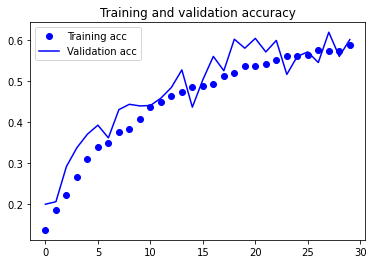

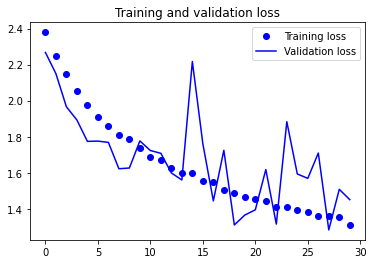

In [19]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
# Save the Model
model1.save('food_model_1.h5')

### Model #2

In [30]:
# Build the Model
from tensorflow.keras.applications import VGG16
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

In [31]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 15,797,706
Trainable params: 15,797,706
Non-trainable params: 0
__________________________________________

In [50]:
conv_base.trainable = False

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=3e-5),
              metrics=['acc'])

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [16]:
history = model2.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Train for 375 steps, validate for 50 steps
Epoch 1/30
375/375 [==============================] - 107s 285ms/step - loss: 1.8210 - acc: 0.3769 - val_loss: 1.3968 - val_acc: 0.5550
Epoch 2/30
375/375 [==============================] - 107s 286ms/step - loss: 1.4463 - acc: 0.5167 - val_loss: 1.1960 - val_acc: 0.5930
Epoch 3/30
375/375 [==============================] - 109s 290ms/step - loss: 1.3100 - acc: 0.5608 - val_loss: 1.1955 - val_acc: 0.5860
Epoch 4/30
375/375 [==============================] - 109s 290ms/step - loss: 1.2448 - acc: 0.5769 - val_loss: 1.1099 - val_acc: 0.6180
Epoch 5/30
375/375 [==============================] - 111s 296ms/step - loss: 1.1950 - acc: 0.6000 - val_loss: 1.0636 - val_acc: 0.6420
Epoch 6/30
375/375 [==============================] - 109s 292ms/step - loss: 1.1762 - acc: 0.6051 - val_loss: 1.1365 - val_acc: 0.6060
Epoch 7/30
375/375 [==============================] - 109s 291ms/step - loss: 1.1392 - acc: 0.6139 - val_loss: 1.0194 - val_acc: 0.6530
Epoch

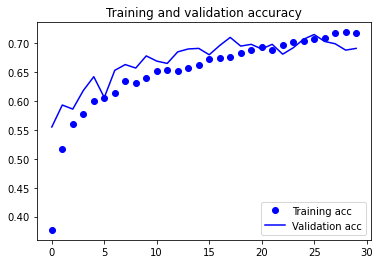

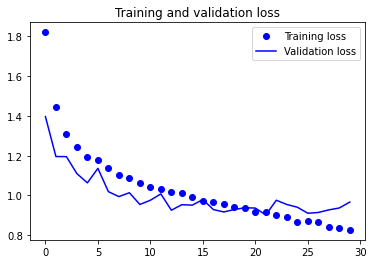

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Pre-train Fine Tuning

In [32]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [33]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [34]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])        
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 15,797,706
Trainable params: 8,162,442
Non-trainable params: 7,635,264
___________________________________

In [35]:
history = model2.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Train for 375 steps, validate for 50 steps
Epoch 1/30
375/375 [==============================] - 117s 313ms/step - loss: 2.0613 - acc: 0.2820 - val_loss: 1.6023 - val_acc: 0.4770
Epoch 2/30
375/375 [==============================] - 119s 316ms/step - loss: 1.5165 - acc: 0.4933 - val_loss: 1.2969 - val_acc: 0.5620
Epoch 3/30
375/375 [==============================] - 120s 320ms/step - loss: 1.2998 - acc: 0.5620 - val_loss: 1.1261 - val_acc: 0.6250
Epoch 4/30
375/375 [==============================] - 119s 317ms/step - loss: 1.1856 - acc: 0.6073 - val_loss: 1.0334 - val_acc: 0.6480
Epoch 5/30
375/375 [==============================] - 121s 322ms/step - loss: 1.0848 - acc: 0.6364 - val_loss: 0.9977 - val_acc: 0.6760
Epoch 6/30
375/375 [==============================] - 119s 318ms/step - loss: 1.0221 - acc: 0.6645 - val_loss: 0.8537 - val_acc: 0.7190
Epoch 7/30
375/375 [==============================] - 120s 319ms/step - loss: 0.9748 - acc: 0.6827 - val_loss: 0.8759 - val_acc: 0.7210
Epoch

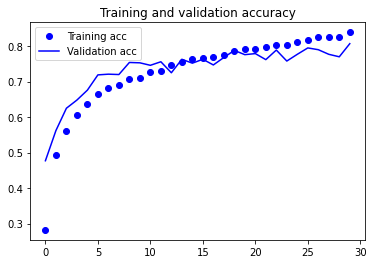

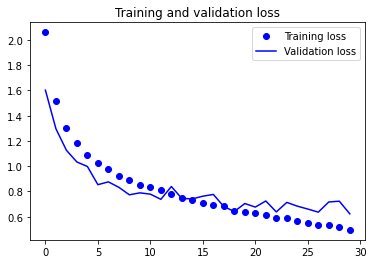

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# Save the Model
model2.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [27]:
# Model #1
model1.load_weights('food_model_1.h5')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model1.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 132ms/step - loss: 1.3987 - acc: 0.5720
test acc: 0.572


In [38]:
# Model #2
model2.load_weights('food_model_2.h5')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator, steps=25)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
25/25 [==============================] - 4s 178ms/step - loss: 0.6693 - acc: 0.7900
test acc: 0.79


In [39]:
# Save the best model
model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [4]:
# Load the model
best_model = load_model('C:/Users/Brayden/Documents/NP CSF/Year 2 Semester 1/DL/Assignments/Assignment 1/food_model_best.h5')

In [5]:
# Load the food list (in alphabetical order)
with open('2.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'bibimbap', 'breakfast_burrito', 'cheesecake', 'chicken_quesadilla', 'mussels', 'nachos', 'pad_thai', 'poutine', 'steak']


In [6]:
# Define some related functions for image process and model prediction
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

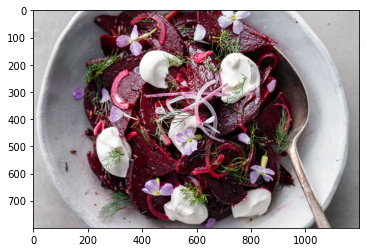

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Brayden\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-1c8db9d0bcc8>", line 8, in <module>
    prob_df, result = prediction(model2, img_array, food_list)
NameError: name 'model2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Brayden\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Brayden\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\B

In [ ]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'bs.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

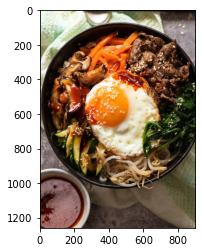

The prediction is:  bibimbap 

      beet_salad  bibimbap  breakfast_burrito    cheesecake  \
0  5.418988e-07  0.999994       1.471020e-07  9.916788e-08   

   chicken_quesadilla       mussels    nachos      pad_thai       poutine  \
0        9.684683e-08  2.971338e-07  0.000004  1.419363e-08  2.559005e-08   

          steak  
0  2.854315e-07  


In [74]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'bimbimbap.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

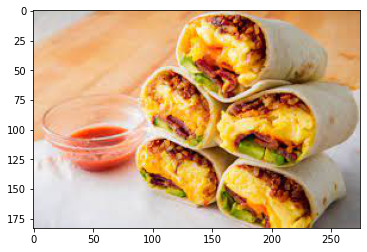

The prediction is:  breakfast_burrito 

    beet_salad  bibimbap  breakfast_burrito  cheesecake  chicken_quesadilla  \
0    0.000581  0.000315           0.995158    0.000039            0.002468   

    mussels    nachos  pad_thai       poutine     steak  
0  0.000118  0.000455  0.000064  8.605431e-07  0.000802  


In [75]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'breakfast burrito.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

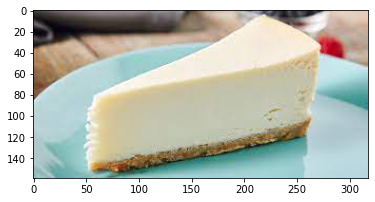

The prediction is:  cheesecake 

    beet_salad  bibimbap  breakfast_burrito  cheesecake  chicken_quesadilla  \
0      0.0003  0.000006           0.000246    0.999151            0.000097   

    mussels    nachos  pad_thai   poutine     steak  
0  0.000093  0.000053  0.000023  0.000016  0.000016  


In [76]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'cheesecake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

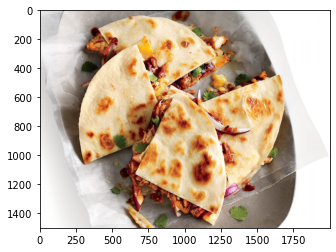

The prediction is:  chicken_quesadilla 

    beet_salad  bibimbap  breakfast_burrito    cheesecake  chicken_quesadilla  \
0    0.000002  0.000003           0.002798  5.976432e-07            0.995203   

        mussels    nachos      pad_thai   poutine         steak  
0  1.401165e-07  0.000073  1.555651e-08  0.001919  5.189671e-07  


In [78]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'chicken.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

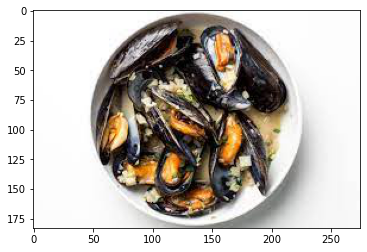

The prediction is:  mussels 

    beet_salad  bibimbap  breakfast_burrito  cheesecake  chicken_quesadilla  \
0    0.000002  0.000011           0.000003     0.00001        9.690133e-08   

   mussels    nachos      pad_thai   poutine     steak  
0  0.99996  0.000001  7.227460e-08  0.000006  0.000007  


In [79]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'mussels.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

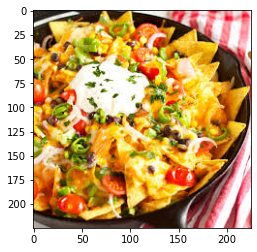

The prediction is:  nachos 

    beet_salad  bibimbap  breakfast_burrito  cheesecake  chicken_quesadilla  \
0    0.000194  0.000351           0.000363    0.000002            0.002038   

    mussels    nachos  pad_thai   poutine     steak  
0  0.000004  0.991588  0.000304  0.005149  0.000007  


In [83]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'nacho.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

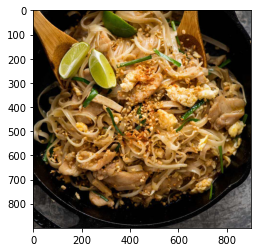

The prediction is:  pad_thai 

    beet_salad  bibimbap  breakfast_burrito    cheesecake  chicken_quesadilla  \
0    0.000056  0.041982           0.000016  2.268783e-07            0.000015   

    mussels    nachos  pad_thai   poutine     steak  
0  0.000157  0.000579   0.95688  0.000035  0.000279  


In [80]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'padthai.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

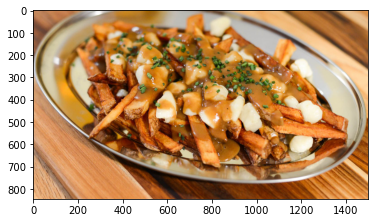

The prediction is:  poutine 

    beet_salad  bibimbap  breakfast_burrito    cheesecake  chicken_quesadilla  \
0    0.000011  0.000005           0.000016  3.653061e-08            0.000066   

    mussels    nachos  pad_thai   poutine     steak  
0  0.000021  0.000685  0.000028  0.999141  0.000026  


In [81]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'poutine.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

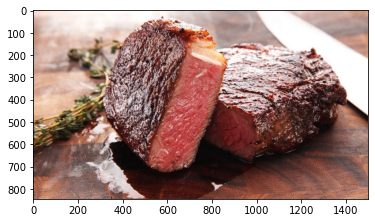

The prediction is:  steak 

    beet_salad  bibimbap  breakfast_burrito  cheesecake  chicken_quesadilla  \
0    0.000999  0.000437           0.003446    0.006364            0.000209   

    mussels   nachos  pad_thai  poutine     steak  
0  0.000545  0.00002  0.000416  0.00002  0.987545  


In [82]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'steak.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model2, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

ERROR! Session/line number was not unique in database. History logging moved to new session 680


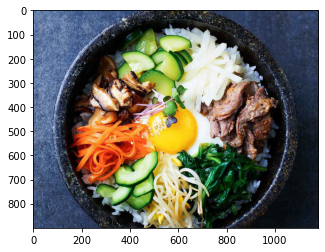

The prediction is:  bibimbap 

    beet_salad  bibimbap  breakfast_burrito    cheesecake  chicken_quesadilla  \
0    0.000041  0.999793           0.000007  4.410113e-08             0.00001   

    mussels    nachos  pad_thai   poutine     steak  
0  0.000002  0.000049  0.000007  0.000004  0.000086  


In [8]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'bimbimbap3.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(best_model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)